In [68]:
%matplotlib inline

import string
import random
import time
import functools
import itertools
import numpy as np
import matplotlib.pyplot as plt

# CO202 Algorithm II Tutorial 1

Please implement a naive string matching algorithm by following the interface as following.

In [14]:
def naive_string_matching(text, pattern):
    """
    The naive string matching algorithm implementation
    
    :param text: input text to be searched
    :param pattern: the pattern to be matched
    :return: the starting index of the matched string, return -1 if nothing found.
    """
    
    # TODO: replace pass with your implementation
    pass

## Evaluation

Let's evaluate your implementation of `naive_string_matching`.

In [19]:
def generate_random_string(N):
    """ Generate a random string that contains a-zA-Z0-9 and whitespace with a given length.
    
    :param N: length of the string to be generated.
    :return: string with length N
    """
    
    sigma = string.ascii_letters + string.digits + ' '
    return ''.join([random.choice(sigma) for _ in range(N)])

In [20]:
generate_random_string(1000)

'mCkFonbriRWEVVesVTI1Coswv89Oam Jk9FyeALV1iVaKA8NSbKXjqGMHvYg3IeZDsErbDNzI83YHLmeGOM8QaiVKEsPtmWkZfxz9MEBZoCEIR2ZnQzu7YT2r2clZX63gT7dac7LB qdYhUE2Ic6jyXQjRDjQLnwGyf5jIGZxj5I stHU1FJnTLyt2n2QQKrGP0c7nxmrLLpLcPY06F450Mclk Vi0ZB okjC0uHnSN4PBLtzWn9vj1yO8ZjmMpNH06lsY3MLkROvIZtaHCzeNWG5Vh3NN0aKt4RXVQcj7AtTkqbiu1Kdg6TbMpJ4FKVHAYcokRAlmLR8TsNWN7MxY8jVwVOPGrdBEcCwHlaJuByu860FSjD9VuLW6NvQulxAT4oFrahfenT7c3Smj8MCj1qsf2 J4cXeI1 mVv6fCyqzIsOuuR0ypZvIdJegvepXobgVyQx6LV1gweFAA6xCDC xwWwoKgIm0DW12YpHTXjj7zzPbMPA3uRsNQ4Yyj6ZkFjwaALmf0mpqn6qvnTyP7kaJoJ1x114JUR 2JyKNo6ilhmQN7G sOCXqpXT4AVn 4qhZVWbGv4tzxdifhfcx9O0MqnLg1emQDCRD HCN3m9xU2rofzEALSLs6oaviLJyAhU WKYdYODgTpGuybjaLBCJszYWVucoI39Av8f pMMm4Xrf Oa AZv9iTkORC586AoQXtVCXeogbnGlZNaakVVdCckbBPbnQLzbmOasaGUkamd9BeEzxhTObuYHxihSD5egjDQWqIyzB6DRDUeieLcKdZRRJroKw8BOOcrwYz8ScTKrgQNFDOULCifI4LS QZiBYl9r PodZn18IMI4GHJ36AalbCn7MnsV9En6ZlOlcYU9HpXE1CbQeI2gGQTVOufB3OLNLzGX2sryJuviV8Limyq9dGvRvKmIqBuqfBEj29TDW7KkJDQB2wMsHZ8n 4RzKZEFBtkXsu0FnTgshcUmses1 71pWHPYy

## Sanity Checks

The following assertions check whether you have properly implemented the function.

In [17]:
# sanity checks
assert naive_string_matching('abc', 'a') is not None, "Should not return None"
assert naive_string_matching('abc', 'a') == 0, "Should return 0 since we can find 'a' in the beginning"
assert naive_string_matching('abc', 'd') == -1, "Should return -1 for a failed-to-match case"

## Time Complexity

Then, we try to plot the processing time of your implementation, and compare it to the default `find` function provided by Python.

In [76]:
def collect_processing_time(fn, M, N, num_samples=100):
    """ Generate random strings and collect the average processing time.
    Since it is not highly possible that a randomly generated pattern can be
    found in another randomly generated string, we are actually collecting
    the worst-case processing time.
    
    :param fn: the matching function object
    :param M: the length of the text
    :param N: the length of the pattern
    :param num_samples: number of samples for evaluation
    :return: the collected processing time
    """
    
    text = generate_random_string(M)
    pattern = generate_random_string(N)
    elapsed = np.zeros(num_samples)
    
    for i in range(num_samples):
        start = time.time()
        fn(text, pattern)
        end = time.time()
        elapsed[i] = end - start
        
    return elapsed.mean() * 1e3 # in ms

In [77]:
collect_processing_time(lambda s,p: s.find(p), 10000000, 1000)

4.0805888175964355

In [104]:
def plot_time_complexity(fn, axes, min_len=100, max_len=1000, num_points=50, fix_M=1000, fix_N=5, label=None):
    """ Try to plot the time complexity of the given function.
    
    :param fn: the function object
    :param axes: where to plot the result
    :param min_len: minimum string length to explore
    :param max_len: maximum string length to explore
    :param num_points: number of data points to be plotted
    :param fix_M: the fixed value of M when varying N
    :param fix_N: the fixed value of N when varying M
    :param label: name of the implementation
    :return: None
    """
    assert min_len < max_len
    assert min_len < fix_M
    
    Ms = np.linspace(min_len, max_len, num_points)
    Ns = np.linspace(min_len, fix_M, num_points)
    
    # fix N and change M
    Ts = [collect_processing_time(fn, int(M), fix_N) for M in Ms]
    axes[0,0].plot(Ms, Ts, label=label)
    axes[0,0].set_xlabel('M')
    axes[0,0].set_ylabel('Time (ms)')
    axes[0,0].legend()
    
    # fix M and change N
    Ts = [collect_processing_time(fn, fix_M, int(N)) for N in Ns]
    axes[0,1].plot(Ns, Ts, label=label)
    axes[0,1].set_xlabel('N')
    axes[0,1].legend()
    
    # change M and N
    Ts = [collect_processing_time(fn, int(M), int(N))
          for M, N in zip(Ms, Ns)]
    axes[1,0].plot(np.multiply(Ms, Ns), Ts, label=label)
    axes[1,0].set_xlabel('MN')
    axes[1,0].set_ylabel('Time (ms)')
    axes[1,0].legend()
    
    axes[1,1].plot(np.add(Ms, Ns), Ts, label=label)
    axes[1,1].set_xlabel('M+N')
    axes[1,1].legend()

CPU times: user 172 ms, sys: 0 ns, total: 172 ms
Wall time: 171 ms


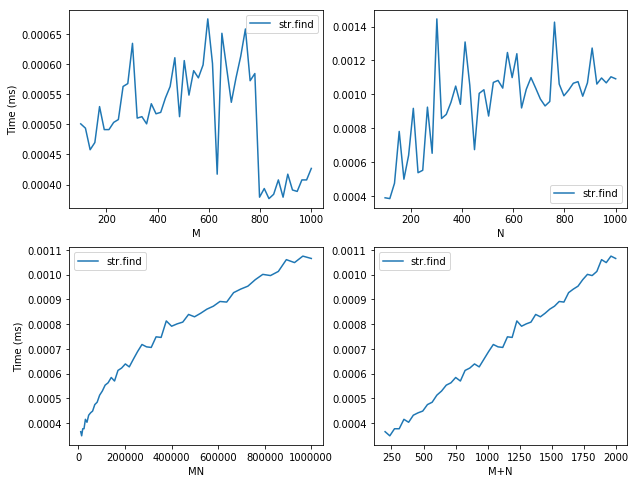

In [106]:
%%time
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
# plot the str.find based method
plot_time_complexity(lambda s,p: s.find(p), axes, label='str.find')

TODO: try to run the following snippet and collect the result for your naive matching algorithm processing time.

> This snippet may run a long time. If your machine is not that powerful, you can reduce the search space by tuning the max_len, num_points, fix_M, etc.

CPU times: user 3.5 s, sys: 0 ns, total: 3.5 s
Wall time: 3.51 s


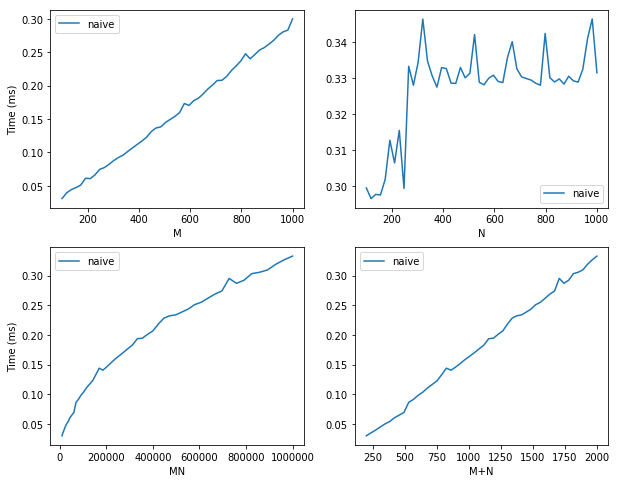

In [107]:
%%time
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
# plot your own naive matching method
plot_time_complexity(lambda s,p: naive_string_matching(s, p), axes, label='naive')